In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [2]:
fsclean = pd.read_csv('fsnewcleanlabel.csv')
fsclean

,ulasan,rating,kategori,nama_produk,ulasan_tokenize,ulasan_normalized,ulasan_stop_removed,ulasan_Stemmed,ulasan_clean,label
0,terlalu kecil ukurannya,5,fashion,Sepatu Sneakers Adidas Swift Run Harian Runnin...,"['terlalu', 'kecil', 'ukurannya']","['terlalu', 'kecil', 'ukurannya']",['ukurannya'],['ukur'],ukur,2
1,terimakasih gan barang josss gandosss sesuai m...,5,fashion,Sepatu Sneakers Adidas Swift Run Harian Runnin...,"['terimakasih', 'gan', 'barang', 'josss', 'gan...","['terima kasih', 'juragan', 'barang', 'bagus',...","['terima kasih', 'juragan', 'barang', 'bagus',...","['terima kasih', 'juragan', 'barang', 'bagus',...",terima kasih juragan barang bagus gandosss ses...,2
2,produk bagus tp ternyata bagian atas dijahit g...,4,fashion,Sepatu Sneakers Adidas Swift Run Harian Runnin...,"['produk', 'bagus', 'tp', 'ternyata', 'bagian'...","['produk', 'bagus', 'tetapi', 'ternyata', 'bag...","['produk', 'bagus', 'dijahit', 'elastis', 'mas...","['produk', 'bagus', 'jahit', 'elastis', 'masuk...",produk bagus jahit elastis masuk kaki size,2
3,sepatunya bagus tidak ada cacat tapi ukuran te...,4,fashion,Sepatu Sneakers Adidas Swift Run Harian Runnin...,"['sepatunya', 'bagus', 'tidak', 'ada', 'cacat'...","['sepatunya', 'bagus', 'tidak', 'ada', 'cacat'...","['sepatunya', 'bagus', 'cacat', 'ukuran', 'ses...","['sepatu', 'bagus', 'cacat', 'ukur', 'sesak', ...",sepatu bagus cacat ukur sesak ukur kaki,2
4,sepatu sesuai dengan harganya,3,fashion,Sepatu Sneakers Adidas Swift Run Harian Runnin...,"['sepatu', 'sesuai', 'dengan', 'harganya']","['sepatu', 'sesuai', 'dengan', 'harganya']","['sepatu', 'sesuai', 'harganya']","['sepatu', 'sesuai', 'harga']",sepatu sesuai harga,1
...,...,...,...,...,...,...,...,...,...,...
10008,biar bintang yang bicara,5,fashion,Jogger Pants Nike FC,"['biar', 'bintang', 'yang', 'bicara']","['biar', 'bintang', 'yang', 'bicara']","['biar', 'bintang', 'bicara']","['biar', 'bintang', 'bicara']",biar bintang bicara,2
10009,barangnya sudah sampai gan thanks,5,fashion,Jogger Pants Nike FC,"['barangnya', 'sudah', 'sampai', 'gan', 'thanks']","['barangnya', 'sudah', 'sampai', 'juragan', 't...","['barangnya', 'juragan', 'terima kasih']","['barang', 'juragan', 'terima kasih']",barang juragan terima kasih,2
10010,barang sudah sampe terima kasih mba,4,fashion,Jogger Pants Nike FC,"['barang', 'sudah', 'sampe', 'terima', 'kasih'...","['barang', 'sudah', 'sampai', 'terima', 'kasih...","['barang', 'terima', 'kasih', 'mbak']","['barang', 'terima', 'kasih', 'mbak']",barang terima kasih mbak,2
10011,packing rapiii bangeett barang ok smua thanks,5,fashion,Jogger Pants Nike FC,"['packing', 'rapiii', 'bangeett', 'barang', 'o...","['packing', 'rapiii', 'banget', 'barang', 'oke...","['packing', 'rapiii', 'banget', 'barang', 'oke...","['packing', 'rapiii', 'banget', 'barang', 'oke...",packing rapiii banget barang oke terima kasih,2


In [3]:
Ulasan = fsclean['ulasan_clean']
Ulasan.isnull().sum()

63

In [4]:
Ulasan = fsclean.fillna('tidak ada komentar')

# split data 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fsclean['ulasan_clean'], fsclean['label'], 
                                                    test_size=0.3, stratify=fsclean['label'], random_state=30)

In [6]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Make sure to update labels accordingly

X_test = X_test.dropna()
y_test = y_test[X_test.index] 
# Check if there are still NaN values
print("NaN in X_train:", X_train.isnull().any())
print("NaN in X_test:", X_test.isnull().any())

NaN in X_train: False
NaN in X_test: False


# BOW

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# Bag of Words (BoW) Vectorization
vectorizer = CountVectorizer(decode_error='replace', encoding='utf-8')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [8]:
print("Shape after BoW Vectorization:")
print("X_train_bow.shape:", X_train.shape)
print("X_test_bow.shape:", X_test.shape)

Shape after BoW Vectorization:
X_train_bow.shape: (6964, 4372)
X_test_bow.shape: (2986, 4372)


# RESAMPLING

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={1:2000, 0:2000})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

2    6520
1    2000
0    2000
Name: label, dtype: int64

In [10]:
from imblearn.under_sampling import RandomUnderSampler

# Menggunakan Random Under-sampling hanya pada kelas tertentu
under_sampler = RandomUnderSampler(sampling_strategy={2: 2000})
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train_resampled, y_train_resampled)
y_train_resampled.value_counts()

0    2000
1    2000
2    2000
Name: label, dtype: int64

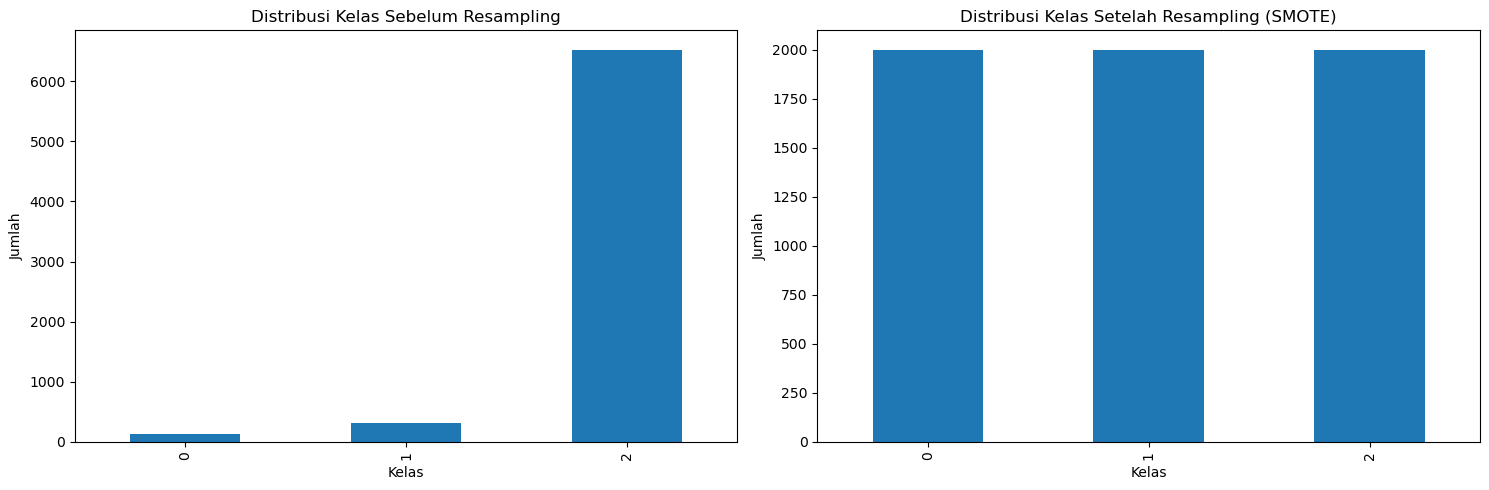

In [11]:
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas sebelum dan setelah resampling
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
y_train.value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kelas Sebelum Resampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.subplot(1, 2, 2)
pd.Series(y_train_resampled).value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Kelas Setelah Resampling (SMOTE)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

# MelakukanPrediksi

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Klasifikasi menggunakan Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)
rf_predictions = rf_classifier.predict(X_test)

# Evaluasi hasil klasifikasi Random Forest
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.43      0.15        61
           1       0.08      0.34      0.13       129
           2       0.96      0.73      0.83      2796

    accuracy                           0.71      2986
   macro avg       0.38      0.50      0.37      2986
weighted avg       0.90      0.71      0.78      2986



In [13]:
# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_classifier.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.16      0.07        61
           1       0.09      0.25      0.13       129
           2       0.95      0.82      0.88      2796

    accuracy                           0.78      2986
   macro avg       0.36      0.41      0.36      2986
weighted avg       0.89      0.78      0.83      2986



In [14]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.46      0.13        61
           1       0.07      0.41      0.12       129
           2       0.97      0.63      0.76      2796

    accuracy                           0.62      2986
   macro avg       0.37      0.50      0.34      2986
weighted avg       0.91      0.62      0.72      2986



In [15]:
# Klasifikasi menggunakan Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)
nb_predictions = nb_classifier.predict(X_test)

# Evaluasi hasil klasifikasi Naive Bayes
print("Classification Report:\n", classification_report(y_test, nb_predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.38      0.19        61
           1       0.11      0.34      0.17       129
           2       0.96      0.83      0.89      2796

    accuracy                           0.80      2986
   macro avg       0.40      0.52      0.42      2986
weighted avg       0.91      0.80      0.85      2986



In [16]:
# KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_classifier.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.62      0.10        61
           1       0.06      0.60      0.12       129
           2       0.98      0.36      0.53      2796

    accuracy                           0.38      2986
   macro avg       0.36      0.53      0.25      2986
weighted avg       0.92      0.38      0.50      2986

